<a href="https://colab.research.google.com/github/a33211/Data-science-homeworks/blob/main/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Завдання_1**


Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

In [7]:
import pandas as pd
from google.colab import files
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
df_2d = pd.read_csv('/content/drive/MyDrive/GOIT_DS_Course_data/6_task_data/data_2d.csv')
df_mnist = pd.read_csv('/content/drive/MyDrive/GOIT_DS_Course_data/6_task_data/mnist.csv')
inertias_df_2d = []
k_values_df_2d = []
inertias__mnist = []
k_values__mnist = []

In [ ]:
# Розрахунок кількості центроїдів для першого датасету (df_2d) в збільшеній кількості ітерацій 20
for k in range(1, 21):
    # Створення моделі KMeans
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_2d)
    
    # Збереження цінерції та числа ценроїдів
    inertias_df_2d.append(kmeans.inertia_)
    k_values_df_2d.append(k)

In [ ]:
# Розрахунок кількості центроїдів для другого датасету (df_mnist) в зменшеній кількості ітерацій  10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_2d)
    inertias__mnist.append(kmeans.inertia_)
    k_values__mnist.append(k)

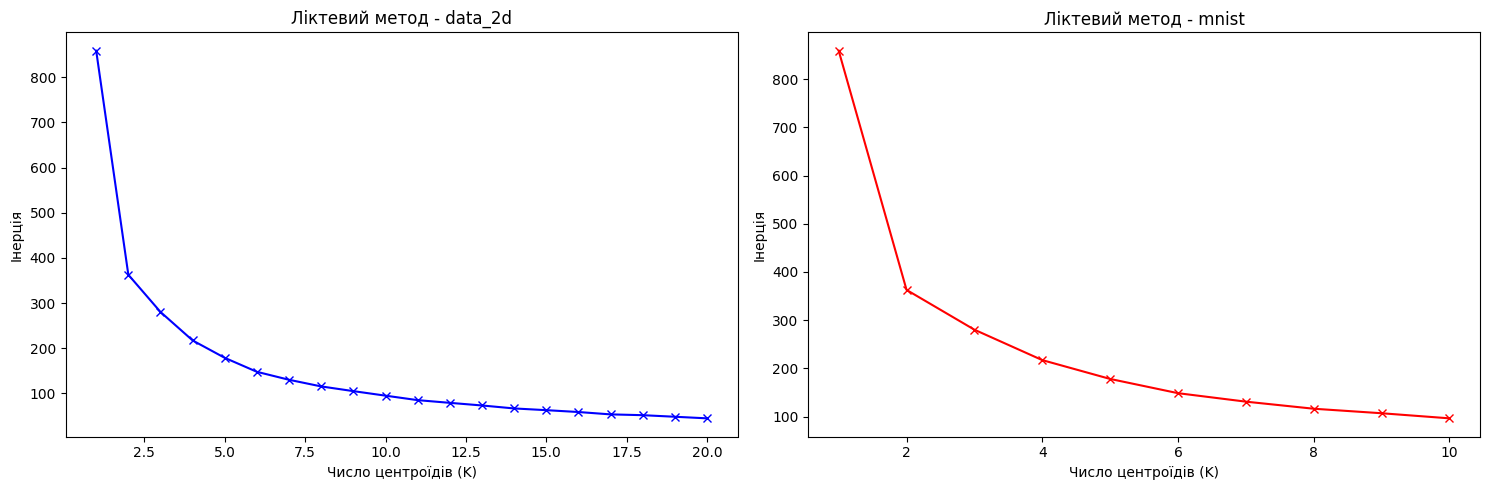

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Графік першого датасета
axs[0].plot(k_values_df_2d, inertias_df_2d, 'bx-')
axs[0].set_xlabel('Число центроїдів (K)')
axs[0].set_ylabel('Інерція')
axs[0].set_title('Ліктевий метод - data_2d')

# Графік другого датасета
axs[1].plot(k_values__mnist, inertias__mnist, 'rx-')
axs[1].set_xlabel('Число центроїдів (K)')
axs[1].set_ylabel('Інерція')
axs[1].set_title('Ліктевий метод - mnist')

plt.tight_layout()
plt.show()

# **Завдання 2**


Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоримтом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

1 датасет

In [30]:
#перетренування згідно попереднім графікам центроїдів
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_2d)

# Прогноз кластеров для кожної точки данных
labels = kmeans.predict(df_2d)

# Визначення координат центроїдів
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
# Визуализация результатов кластеризации
plt.scatter(df_2d[:, 0], df_2d[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Результаты кластеризации')
plt.show()

InvalidIndexError: ignored